In [ ]:
# !python3.10 -m pip install [library]

In [2]:
!python3.10 -m pip install scikit-learn

  Using cached scikit_learn-1.5.2-cp310-cp310-win_amd64.whl (11.0 MB)
  Using cached threadpoolctl-3.5.0-py3-none-any.whl (18 kB)
  Using cached joblib-1.4.2-py3-none-any.whl (301 kB)



[notice] A new release of pip is available: 23.0.1 -> 24.3.1
[notice] To update, run: C:\Users\rodri\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [3]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

from PIL import Image
from get_iris import *
from feature_extractor import *
from train_models import *

# Imagen de ejemplo

In [39]:
db_path = '../CASIA-IrisV3'
db_path_interval = db_path + '/CASIA-Iris-Interval'
db_path_lamp     = db_path + '/CASIA-Iris-Lamp'
db_path_twins    = db_path + '/CASIA-Iris-Twins'

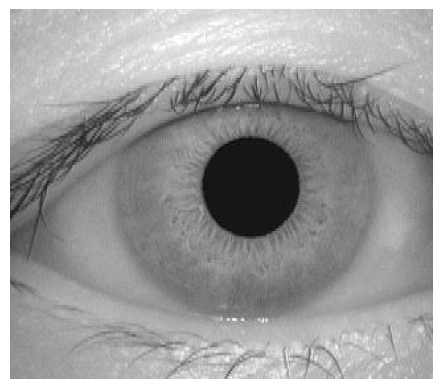

In [40]:
path_ex_casiav1 = '../CASIA-IrisV1/1/001_1_1.jpg'
path_ex_casiav3 = db_path_lamp + '/005/L/S2005L03.jpg'
img1_ex = cv2.imread(path_ex_casiav1, 0)

plt.imshow(img1_ex, cmap='gray')
plt.axis('off')
plt.show()

# Extracción de información desde el iris

Inner circle (x,y,r) = (np.float64(182.0), np.float64(134.0), np.int64(37))
Outer circle (x,y,r) = (np.float64(180.0), np.float64(137.0), np.int64(99))


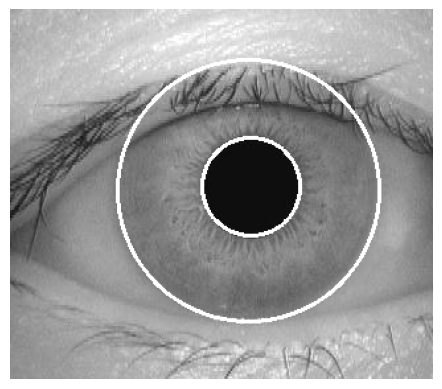

In [41]:
# python-iris-recognition/iris/python/fnc/boundary.py
y_inn, x_inn, r_inn = searchInnerBound(img1_ex)
y_out, x_out, r_out = searchOuterBound(img1_ex, y_inn, x_inn, r_inn)
print(f'Inner circle (x,y,r) = {(x_inn, y_inn, r_inn)}')
print(f'Outer circle (x,y,r) = {(x_out, y_out, r_out)}')

img2_ex = img1_ex.copy()
cv2.circle(img2_ex, (int(x_inn), int(y_inn)), r_inn, (255), thickness=2)
cv2.circle(img2_ex, (int(x_out), int(y_out)), r_out, (255), thickness=2)
plt.imshow(img2_ex, cmap='gray')
plt.axis('off')
plt.show()

In [42]:
segment(img1_ex)

([np.int64(137), np.int64(180), np.int64(99)],
 [np.int64(134), np.int64(182), np.int64(37)],
 array([[173., 171., 170., ..., 179., 184., 170.],
        [172., 170., 170., ..., 186., 184., 171.],
        [173., 172., 171., ..., 196., 185., 172.],
        ...,
        [156., 154., 152., ..., 172., 183., 194.],
        [156., 154., 151., ..., 170., 180., 191.],
        [155., 153., 150., ..., 169., 176., 185.]]))

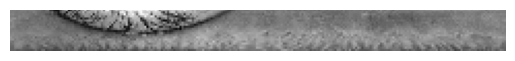

(20, 240)


In [43]:
norm = normalize(img1_ex, x_inn, y_inn, r_inn, x_out, y_out, r_out, 20, 240)
plt.imshow(norm[0], cmap='gray')
plt.axis('off')
plt.show()
print(norm[0].shape)

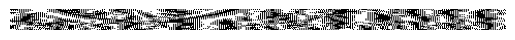

(20, 480)


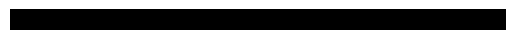

(20, 480)


In [47]:
enc = encode(norm[0], norm[1], minWaveLength, mult, sigmaOnf)

plt.imshow(enc[0],cmap='gray')
plt.axis('off')
plt.show()
print(enc[0].shape)

# Solo son 0s?
plt.imshow(enc[1],cmap='gray')
plt.axis('off')
plt.show()
print(enc[1].shape)

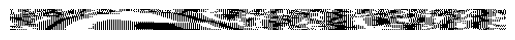

[[  0 255   0 ... 255   0 255]
 [255   0 255 ...   0 255   0]
 [255   0 255 ...   0 255   0]
 ...
 [255 255   0 ... 255 255 255]
 [255 255 255 ...   0 255   0]
 [  0   0   0 ... 255   0 255]]


In [48]:
gi = get_iris(path_ex_casiav1)
plt.imshow(gi,cmap='gray')
plt.axis('off')
plt.show()
print(gi)

# Extracción de características

In [1]:
# model_name = 'vgg16'
# npp = 100

# db_path = '../CASIA-IrisV3/CASIA-Iris-Lamp'
# sel_eye = 'L'
# res_path = f'../features_{sel_eye}/{model_name}'

# get_features(model_name, db_path, sel_eye, res_path, npp)

In [10]:
# model_name = 'inception'
# npp = 100

# db_path = '../CASIA-IrisV3/CASIA-Iris-Lamp'
# sel_eye = 'L'
# res_path = f'../features_{sel_eye}/{model_name}'

# get_features(model_name, db_path, sel_eye, res_path, npp)

In [11]:
# model_name = 'resnet50'
# npp = 100

# db_path = '../CASIA-IrisV3/CASIA-Iris-Lamp'
# sel_eye = 'L'
# res_path = f'../features_{sel_eye}/{model_name}'

# get_features(model_name, db_path, sel_eye, res_path, npp)

In [2]:
# model_name = 'mobilenet'
# npp = 100

# db_path = '../CASIA-IrisV3/CASIA-Iris-Lamp'
# sel_eye = 'L'
# res_path = f'../features_{sel_eye}/{model_name}'

# get_features(model_name, db_path, sel_eye, res_path, npp)

# Entrenamiento SVM

In [4]:
# model_names = ['vgg16', 'resnet50', 'inception', 'mobilenet']

# for model_name in model_names:
#     ft_path    = f'../features_L/{model_name}'
#     output_dir  = f'../results/svm'
#     if not os.path.exists(output_dir):
#         os.makedirs(output_dir)
#     output_file = f'{output_dir}/{model_name}_results.csv'

#     train_svm_per_layer(ft_path, output_file)

In [5]:
# model_names = ['vgg16', 'resnet50', 'inception', 'mobilenet']

# for model_name in model_names:
#     ft_path    = f'../features_L/{model_name}'
#     output_dir  = f'../results/rf'
#     if not os.path.exists(output_dir):
#         os.makedirs(output_dir)
#     output_file = f'{output_dir}/{model_name}_results.csv'

#     train_rf_per_layer(ft_path, output_file)

# Visualización de resultados

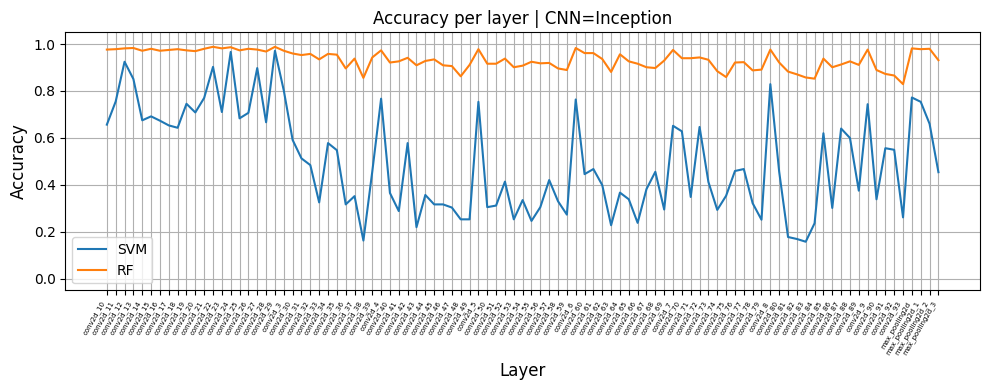

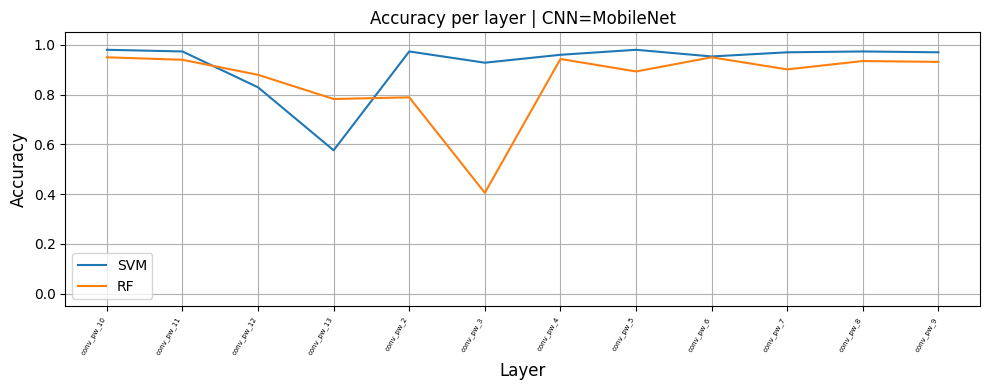

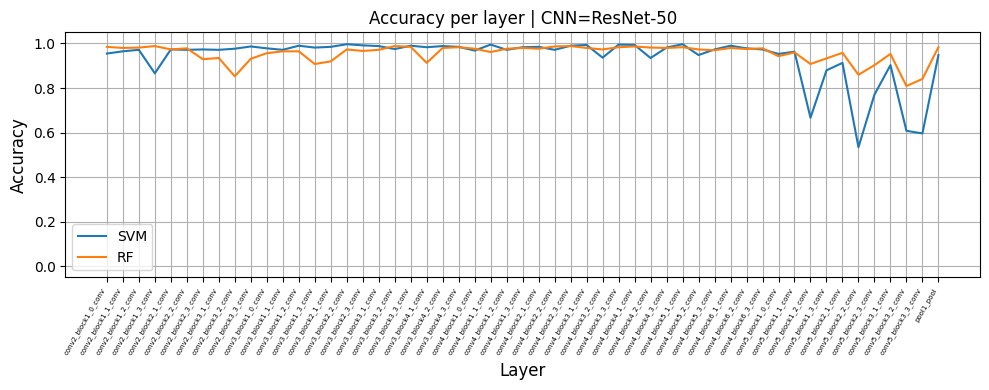

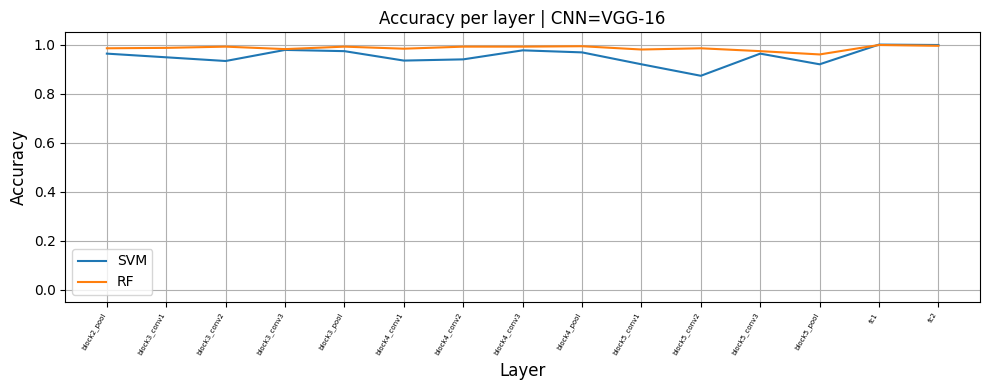

In [107]:
res_path   = '../results'

model_names = ['Inception', 'MobileNet', 'ResNet-50', 'VGG-16']
csv_svm  = [file for file in os.listdir(f'{res_path}/svm') if file.endswith('.csv')]
csv_rf   = [file for file in os.listdir(f'{res_path}/rf') if file.endswith('.csv')]

for i in range(len(model_names)):
    csv_svm_file =  f'{res_path}/svm/{csv_svm[i]}'
    csv_rf_file  =  f'{res_path}/rf/{csv_svm[i]}'

    layer_names    = []
    accuracies_svm = []
    accuracies_rf  = []
    with open(csv_svm_file, "r") as file:
        reader = csv.reader(file)
        for row in reader:
            layer_names.append(row[0])
            accuracies_svm.append(float(row[1]))
    with open(csv_rf_file, "r") as file:
        reader = csv.reader(file)
        for row in reader:
            accuracies_rf.append(float(row[1]))

    x = range(len(layer_names))
    width = 0.3
    eps = 0.05

    plt.figure(figsize=(10, 4))
    # plt.bar([p - width/2 for p in x], accuracies_svm, width=width, label="SVM")
    # plt.bar([p + width/2 for p in x], accuracies_rf, width=width, label="RF") 
    plt.plot(x, accuracies_svm, label='SVM')
    plt.plot(x, accuracies_rf, label='RF')
    plt.ylim(0-eps,1+eps)
    plt.xlabel("Layer", fontsize=12)
    plt.ylabel("Accuracy", fontsize=12)
    plt.title(f"Accuracy per layer | CNN={model_names[i]}")
    plt.xticks(ticks=x, labels=layer_names, rotation=60, ha='right', fontsize=5)
    plt.tight_layout() 
    plt.grid('True')
    plt.legend()
    plt.show()
    print()


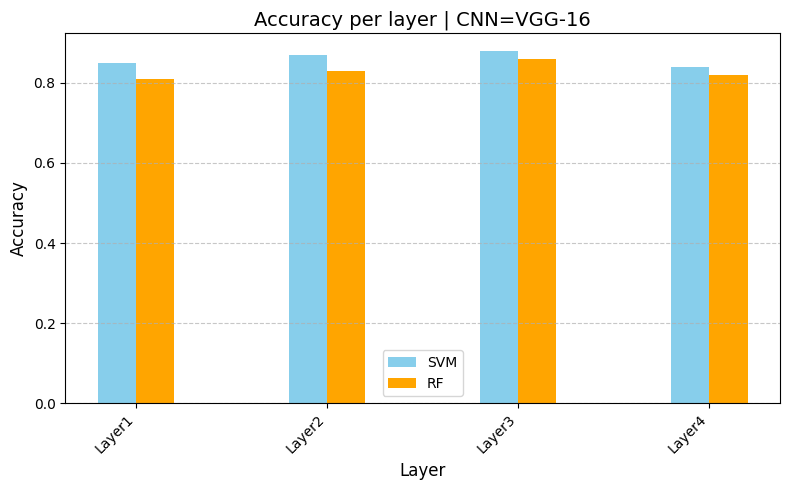

In [83]:
import os
import csv
import matplotlib.pyplot as plt

# Datos de ejemplo (puedes ignorar esta parte si ya tienes tus datos)
res_path = '../results'
classifier = 'svm'

model_names = ['Inception', 'MobileNet', 'ResNet-50', 'VGG-16']
layer_names = ['Layer1', 'Layer2', 'Layer3', 'Layer4']
accuracies_svm = [0.85, 0.87, 0.88, 0.84]
accuracies_rf = [0.81, 0.83, 0.86, 0.82]

# Crear las posiciones de las barras
x = range(len(layer_names))  # Posiciones base para las etiquetas
width = 0.2  # Ancho de las barras

# Crear el gráfico de barras
plt.figure(figsize=(8, 5))
plt.bar([p - width/2 for p in x], accuracies_svm, width=width, label="SVM", color='skyblue')  # Barras SVM
plt.bar([p + width/2 for p in x], accuracies_rf, width=width, label="RF", color='orange')  # Barras RF

# Personalizar el gráfico
plt.xlabel("Layer", fontsize=12)
plt.ylabel("Accuracy", fontsize=12)
plt.title(f"Accuracy per layer | CNN={model_names[i]}", fontsize=14)
plt.xticks(ticks=x, labels=layer_names, rotation=45, ha='right', fontsize=10)  # Etiquetas en el eje x
plt.legend(fontsize=10)  # Leyenda
plt.grid(True, axis='y', linestyle='--', alpha=0.7)  # Agregar líneas de grilla
plt.tight_layout()

# Mostrar el gráfico
plt.show()
